In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12.0, 8.0)

%matplotlib inline

In [2]:
taxi = pd.read_csv('TAXI_Flota_Diario.csv',encoding = 'iso-8859-1',delimiter = ';')


In [3]:
# Tratamiento de datos de campos fecha
taxi.loc[:,'vida'] = 0

taxi['Fecha'] = pd.to_datetime(taxi['Fecha'], dayfirst=True)
taxi['FechaInicio'] = pd.to_datetime(taxi['FechaInicio'], dayfirst=True)
taxi['anoinicio'] = taxi['FechaInicio'].dt.year
taxi['ano'] = taxi['Fecha'].dt.year

# Cálculo de vida de buses
taxi['vida'] = taxi['Fecha'].sub(taxi['FechaInicio'], axis=0)
taxi['vida'] = taxi['vida'] / np.timedelta64(1, 'D') / 365

In [4]:
taxi.count()

Codigo           15652
Marca            15652
Modelo           15652
ClasAmbiental    15645
Combustible      15652
FechaInicio      15652
Fecha            15652
vida             15652
anoinicio        15652
ano              15652
dtype: int64

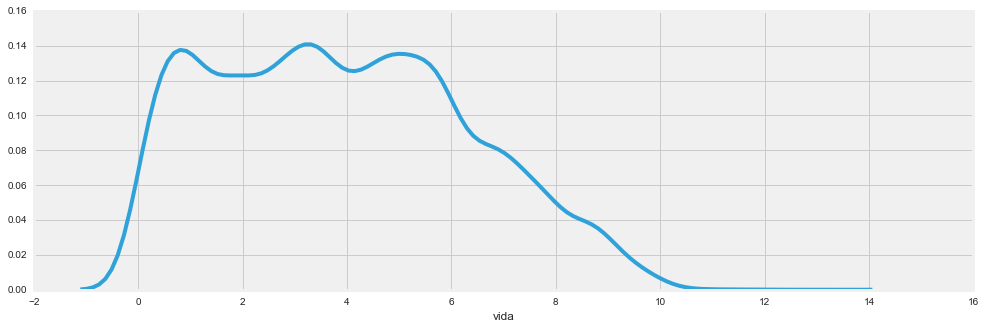

In [5]:
# Distribución de vida actual del parque de taxis
plt.figure(figsize=(15,5))
plot = sns.distplot(taxi['vida'], bins=50, color = sns.color_palette()[0], hist=False)

In [15]:
# Distribución de taxis según su Combustible
taxi_clases = taxi.groupby('Combustible').agg('count')
taxi_counts = taxi_clases.Fecha.sort_values()
taxi_data = pd.DataFrame(taxi_counts).reset_index()

[<matplotlib.text.Text at 0xbac1940>, <matplotlib.text.Text at 0xbabb160>]

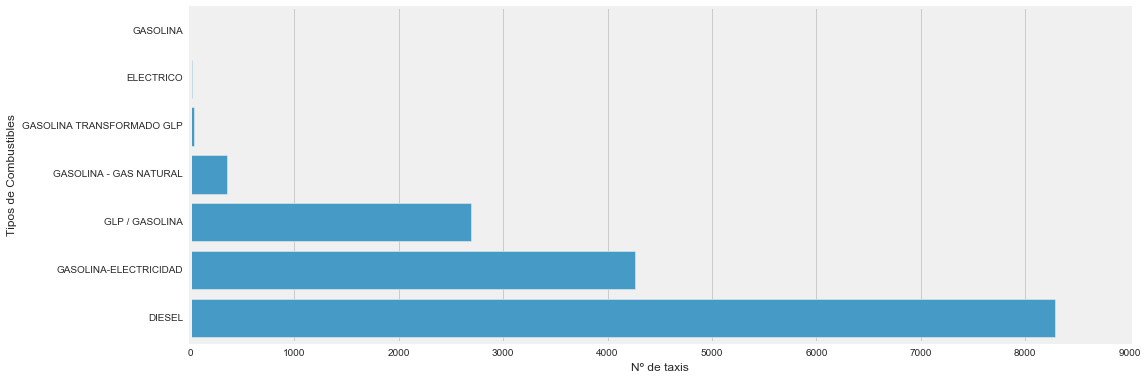

In [7]:
f, ax1 = plt.subplots(figsize=(15,6))
sns.barplot(x='Fecha',y='Combustible', data=taxi_data, color=sns.color_palette()[0])
ax1.set(ylabel="Tipos de Combustibles", xlabel="Nº de taxis")

In [11]:
# Distribución de taxis según su Clase Ambiental
taxi_clases = taxi.groupby('ClasAmbiental').agg('count')
taxi_counts = taxi_clases.Fecha.sort_values()
taxi_data = pd.DataFrame(taxi_counts).reset_index()


[<matplotlib.text.Text at 0xb0526a0>, <matplotlib.text.Text at 0xbabee80>]

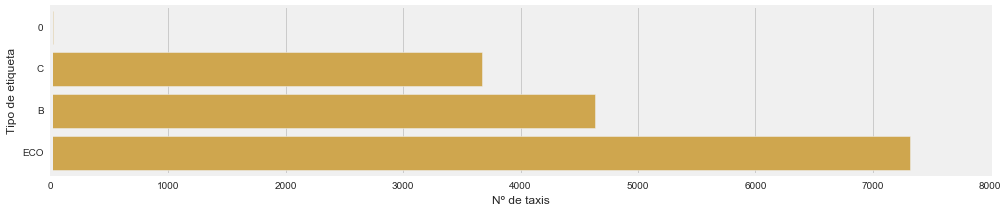

In [9]:
f, ax1 = plt.subplots(figsize=(15,3))
sns.barplot(x='Fecha',y='ClasAmbiental', data=taxi_data, color=sns.color_palette()[2])
ax1.set(ylabel="Tipo de etiqueta", xlabel="Nº de taxis")

In [13]:
taxi['vida'].mean()

3.9192524741903196

In [16]:
taxi_counts

Combustible
GASOLINA                        6
ELECTRICO                      18
GASOLINA TRANSFORMADO GLP      41
GASOLINA - GAS NATURAL        355
GLP / GASOLINA               2692
GASOLINA-ELECTRICIDAD        4259
DIESEL                       8281
Name: Fecha, dtype: int64

In [17]:
taxi['vida'].count()

15652